In [229]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import cohen_kappa_score, roc_curve, auc, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
merged_df = pd.read_csv('Data/merged_df.csv')

In [3]:
# Input team that is on offense
print('Enter your Team:')
x = input()

Enter your Team:
PHI


In [5]:
final_df = merged_df[(merged_df.posteam == x)]

In [6]:
final_df

,Year,posteam,defteam,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,...,Def_Att_Pass,Def_Comp_Pct,Def_TD_PA,Def_INT_PA,Def_NY/A,Def_1D_PA,Def_Att_Rush,Def_TD_RA,Def_Y/A,Def_1D_RA
1852,2019,PHI,WAS,1,75.0,654.0,1554.0,3354.0,1,1.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
1853,2019,PHI,WAS,1,75.0,648.0,1548.0,3348.0,1,2.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
1854,2019,PHI,WAS,1,64.0,617.0,1517.0,3317.0,1,1.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
1855,2019,PHI,WAS,1,62.0,575.0,1475.0,3275.0,1,2.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
1856,2019,PHI,WAS,1,71.0,539.0,1439.0,3239.0,1,3.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99958,2018,PHI,NE,0,11.0,150.0,150.0,150.0,4,2.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406
99959,2018,PHI,NE,0,11.0,145.0,145.0,145.0,4,3.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406
99962,2018,PHI,NE,0,31.0,129.0,129.0,129.0,4,1.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406
99963,2018,PHI,NE,0,29.0,123.0,123.0,123.0,4,2.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406


In [7]:
final_df.reset_index(drop=True, inplace=True)

In [251]:
# Replace Run/Pass with 0/1
final_df['play_type']=final_df['play_type'].replace({'run': '0', 'pass':'1'}).astype(int)
final_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,posteam,defteam,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,...,Def_Att_Pass,Def_Comp_Pct,Def_TD_PA,Def_INT_PA,Def_NY/A,Def_1D_PA,Def_Att_Rush,Def_TD_RA,Def_Y/A,Def_1D_RA
0,2019,PHI,WAS,1,75.0,654.0,1554.0,3354.0,1,1.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
1,2019,PHI,WAS,1,75.0,648.0,1548.0,3348.0,1,2.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
2,2019,PHI,WAS,1,64.0,617.0,1517.0,3317.0,1,1.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
3,2019,PHI,WAS,1,62.0,575.0,1475.0,3275.0,1,2.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
4,2019,PHI,WAS,1,71.0,539.0,1439.0,3239.0,1,3.0,...,540,0.687037,0.064815,0.024074,6.5,0.370370,493,0.028398,4.7,0.243408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,2018,PHI,NE,0,11.0,150.0,150.0,150.0,4,2.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406
3527,2018,PHI,NE,0,11.0,145.0,145.0,145.0,4,3.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406
3528,2018,PHI,NE,0,31.0,129.0,129.0,129.0,4,1.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406
3529,2018,PHI,NE,0,29.0,123.0,123.0,123.0,4,2.0,...,605,0.611570,0.047934,0.029752,6.2,0.343802,367,0.019074,4.9,0.253406


In [252]:
final_df['play_type'].unique()

array([1, 0])

In [119]:
#feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# Modeling

In [253]:
y = final_df['play_type']
X = final_df.drop({'play_type', 'posteam', 'defteam', 'Year'}, axis=1)

In [254]:
# Use MinMaxScaler to scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,...,Def_Att_Pass,Def_Comp_Pct,Def_TD_PA,Def_INT_PA,Def_NY/A,Def_1D_PA,Def_Att_Rush,Def_TD_RA,Def_Y/A,Def_1D_RA
0,1.0,0.755102,0.726363,0.863257,0.931648,0.0,0.000000,0.0,0.225,0.472222,...,0.408333,0.763631,0.857421,0.393469,0.625,0.802409,1.0,0.280383,0.777778,0.662559
1,1.0,0.755102,0.719689,0.859922,0.929981,0.0,0.333333,0.0,0.225,0.472222,...,0.408333,0.763631,0.857421,0.393469,0.625,0.802409,1.0,0.280383,0.777778,0.662559
2,1.0,0.642857,0.685206,0.842690,0.921367,0.0,0.000000,0.0,0.225,0.472222,...,0.408333,0.763631,0.857421,0.393469,0.625,0.802409,1.0,0.280383,0.777778,0.662559
3,1.0,0.622449,0.638487,0.819344,0.909697,0.0,0.333333,0.0,0.175,0.472222,...,0.408333,0.763631,0.857421,0.393469,0.625,0.802409,1.0,0.280383,0.777778,0.662559
4,1.0,0.714286,0.598443,0.799333,0.899694,0.0,0.666667,0.0,0.400,0.472222,...,0.408333,0.763631,0.857421,0.393469,0.625,0.802409,1.0,0.280383,0.777778,0.662559


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=123)

## Random Forest Classifier

In [256]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [257]:
# Test set predictions
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[157 194]
 [ 66 466]]
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       351
           1       0.71      0.88      0.78       532

    accuracy                           0.71       883
   macro avg       0.71      0.66      0.66       883
weighted avg       0.71      0.71      0.69       883

Testing Accuracy for Random Forest Classifier: 70.55%


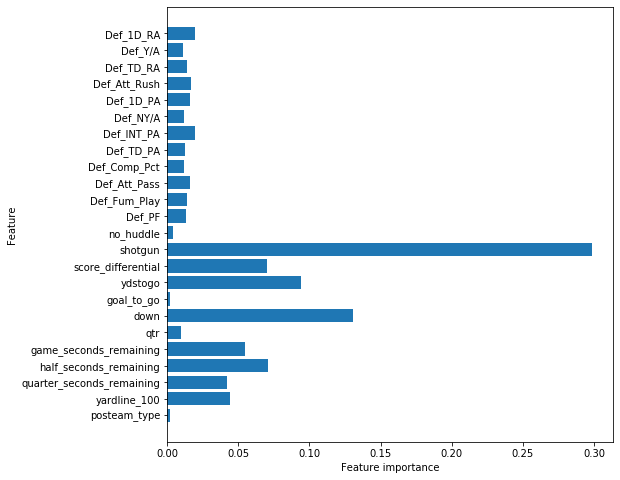

In [258]:
plot_feature_importances(forest)

#### Baseline RFC Interpretation

This baseline RFC model did a good job at predicting 1s (Pass) with a testing recall of .88. So 88% of the time our model was able to predict a pass play was ran.  Our model struggled to predict run plays though.


The top features for this model were: Shotgun, ydstogo, and down

### GridSearch on RFC

In [259]:
model = ensemble.RandomForestClassifier()
parameters = {'n_estimators': [10, 30, 100],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 5, 6, 10],
                'min_samples_split': [5, 10],
                'min_samples_leaf': [3, 6]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6835352235772879

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}



In [264]:
# Instantiate and fit a RandomForestClassifier
forestg =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
forestg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [265]:
# Test set predictions
pred = forestg.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[153 198]
 [ 67 465]]
              precision    recall  f1-score   support

           0       0.70      0.44      0.54       351
           1       0.70      0.87      0.78       532

    accuracy                           0.70       883
   macro avg       0.70      0.65      0.66       883
weighted avg       0.70      0.70      0.68       883

Testing Accuracy for Random Forest Classifier: 69.99%


#### GridSearch RFC Interpretation

The recall grew slighlty worse after the gridsearch.

## Top Features RFC

In [266]:
top_feat = X_scaled[['shotgun', 'score_differential', 'ydstogo', 'down', 'half_seconds_remaining']]
X_train, X_test, y_train, y_test = train_test_split(top_feat, y, test_size = 0.25, random_state=123)

In [267]:
# Instantiate and fit a RandomForestClassifier
forest_top = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest_top.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [268]:
# Test set predictions
pred = forest_top.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[164 187]
 [ 76 456]]
              precision    recall  f1-score   support

           0       0.68      0.47      0.55       351
           1       0.71      0.86      0.78       532

    accuracy                           0.70       883
   macro avg       0.70      0.66      0.67       883
weighted avg       0.70      0.70      0.69       883

Testing Accuracy for Random Forest Classifier: 70.22%


### Gridsearch on RFC Top Features

In [269]:
model = ensemble.RandomForestClassifier()
parameters = {'n_estimators': [10, 30, 100],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 5, 6, 10],
                'min_samples_split': [5, 10],
                'min_samples_leaf': [3, 6]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6941086740471953

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}



In [285]:
# Instantiate and fit a RandomForestClassifier
forest_topg = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
forest_topg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [286]:
# Test set predictions
pred = forest_topg.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[165 186]
 [ 75 457]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       351
           1       0.71      0.86      0.78       532

    accuracy                           0.70       883
   macro avg       0.70      0.66      0.67       883
weighted avg       0.70      0.70      0.69       883

Testing Accuracy for Random Forest Classifier: 70.44%


## Gradient Boosting Classifier

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=123)

In [273]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [274]:
# Test set predictions
pred = gbr.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Gradient Boosting Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[157 194]
 [ 73 459]]
              precision    recall  f1-score   support

           0       0.68      0.45      0.54       351
           1       0.70      0.86      0.77       532

    accuracy                           0.70       883
   macro avg       0.69      0.66      0.66       883
weighted avg       0.69      0.70      0.68       883

Testing Accuracy for Gradient Boosting Classifier: 69.76%


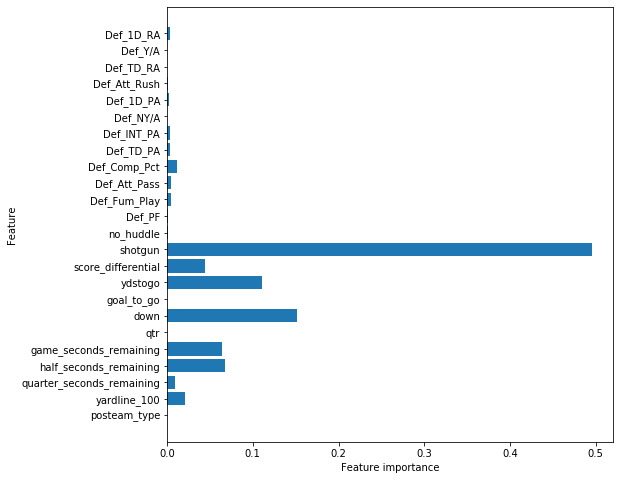

In [275]:
plot_feature_importances(gbr)

### GridSearch on Gradient Boosting Classifier

In [276]:
model = ensemble.GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.6782477341389728

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}



In [291]:
gbrg = ensemble.GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbrg.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [292]:
# Test set predictions
pred = gbrg.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Gradient Boosting Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[167 184]
 [ 78 454]]
              precision    recall  f1-score   support

           0       0.68      0.48      0.56       351
           1       0.71      0.85      0.78       532

    accuracy                           0.70       883
   macro avg       0.70      0.66      0.67       883
weighted avg       0.70      0.70      0.69       883

Testing Accuracy for Gradient Boosting Classifier: 70.33%


## Top Features GBC

In [279]:
X_train, X_test, y_train, y_test = train_test_split(top_feat, y, test_size = 0.25, random_state=123)

In [280]:
gbr_top = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr_top.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [281]:
# Test set predictions
pred = gbr_top.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Gradient Boosting Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[158 193]
 [ 75 457]]
              precision    recall  f1-score   support

           0       0.68      0.45      0.54       351
           1       0.70      0.86      0.77       532

    accuracy                           0.70       883
   macro avg       0.69      0.65      0.66       883
weighted avg       0.69      0.70      0.68       883

Testing Accuracy for Gradient Boosting Classifier: 69.65%


### Gridsearch on Top GBR Features

In [282]:
model = ensemble.GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.6797583081570997

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}



In [295]:
gbr_topg = ensemble.GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gbr_topg.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [296]:
# Test set predictions
pred = gbr_topg.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Testing Accuracy for Gradient Boosting Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[167 184]
 [ 76 456]]
              precision    recall  f1-score   support

           0       0.69      0.48      0.56       351
           1       0.71      0.86      0.78       532

    accuracy                           0.71       883
   macro avg       0.70      0.67      0.67       883
weighted avg       0.70      0.71      0.69       883

Testing Accuracy for Gradient Boosting Classifier: 70.55%


# Interpretation of Model Results

The best model wound up being the Gridsearched GBC Top Features Model.  It had the highest recall on the 0s (Run Plays) at 0.48.  This meant that 48% of the time our model was able to predict a run play was ran.  We sacraficed a small amount of accuracy on predicting pass plays but we still had a recall of 0.86.  The accuracy of both together was 70.55%. Overall all of the models predicted Pass Plays well but did a poor job at predicting Run Plays.

# Top Features

The top predicitve features in the models were: Shotgun, ydstogo, down, halftimesecondsremaing, and scoredifferential

The most predictive feature was whether the offensive team lined up in a shotgun formation.  This makes sense as we saw in the EDA process, if a team lines up in a shotgun formation, then they typically pass the ball 75% of the time.

# Recommendation

If you input data and the model predicts it is a pass play, then you can be fairly confident that the team will pass.  If the model predicts a run play, be very cautious that you do not sell out to the pass because the model was not very accurate in predicting run plays.

# Using Model on Other Teams

In [303]:
# Replace Run/Pass with 0/1
merged_df['play_type']=merged_df['play_type'].replace({'run': '0', 'pass':'1'}).astype(int)

In [304]:
results = pd.DataFrame(columns =['accuracy'])

for tm in merged_df.posteam.unique():
    
    all_df = merged_df[(merged_df.posteam == tm)]

    target = all_df['play_type']
    features = all_df[['shotgun', 'score_differential', 'ydstogo', 'down', 'half_seconds_remaining']]
    data_train, data_test, target_train, target_test = train_test_split(features, target, 
                                                                    test_size = 0.25, random_state=123)
    
    prediction = gbr_topg.predict(data_test)
    accuracy = accuracy_score(target_test, prediction)
   
    results.loc[tm] = [accuracy]

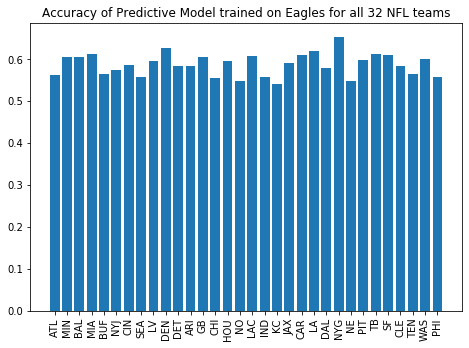

In [305]:
plt.bar(results.index,results.accuracy)
plt.xticks(rotation=90)
plt.title("Accuracy of Predictive Model trained on Eagles for all 32 NFL teams")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()